# Practical 8: Implement K-mean clustering on simple digit dataset using Python

In [ ]:
import sys
import sklearn
import matplotlib
import numpy as np


### 1. Import the MNIST dataset


In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [ ]:
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-5-bf83d3fb3ee5>:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


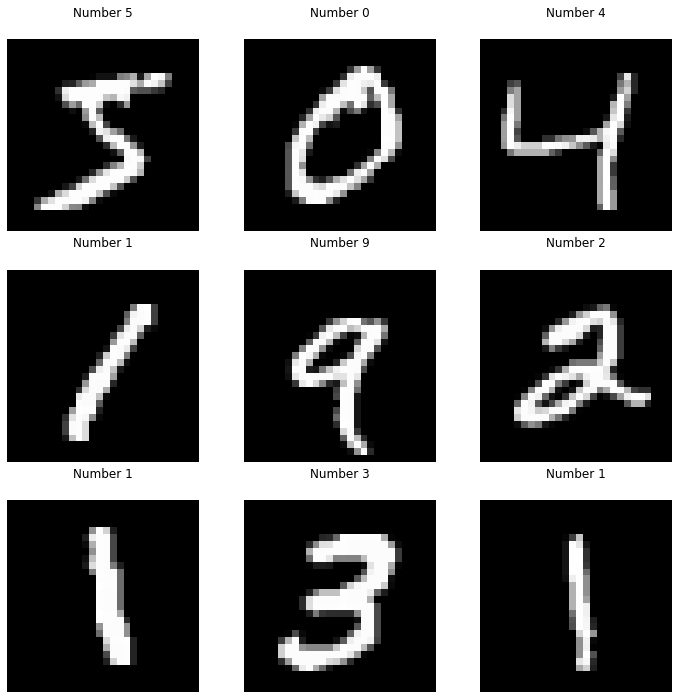

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
fig.show()

### 2. Preprocessing the MNIST images  

In [ ]:
# preprocessing the images

# convert each image to 1 dimensional array
X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


### 3. K-Means Clustering


In [ ]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

10


MiniBatchKMeans(n_clusters=10)

In [ ]:
kmeans.labels_

array([3, 5, 8, ..., 3, 7, 6])

### 4. Assigning Cluster Labels


In [ ]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}

    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))        
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [ ]:
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[3 0 4 8 4 2 1 3 1 4 3 1 3 6 1 7 2 8 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


### 5. Optimizing and Evaluating the Clustering Algorithm

In [ ]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [ ]:
clusters = [10, 16, 36, 64, 144, 256]
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    calculate_metrics(estimator, X, Y)
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 2374037.60733125
Homogeneity: 0.4822428388933837
Accuracy: 0.5711166666666667

Number of Clusters: 16
Inertia: 2206307.189198157
Homogeneity: 0.5743051026273959
Accuracy: 0.6576

Number of Clusters: 36
Inertia: 1955126.2136011187
Homogeneity: 0.6893090778221309
Accuracy: 0.77245

Number of Clusters: 64
Inertia: 1812285.1053975464
Homogeneity: 0.7477268978688143
Accuracy: 0.82635

Number of Clusters: 144
Inertia: 1634694.7962724622
Homogeneity: 0.8089661909164964
Accuracy: 0.8769

Number of Clusters: 256
Inertia: 1514033.5438495697
Homogeneity: 0.8402267247956806
Accuracy: 0.89435



In [ ]:
X_test = x_test.reshape(len(x_test),-1)
X_test = X_test.astype(float) / 255.

kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)

print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.9067

